In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
from google.colab import drive
drive.mount('./drive')

Mounted at ./drive


In [ ]:
dir = '/content/drive/MyDrive/Assignment_HOOM/'

In [3]:
df = pd.read_csv('demand_dataset.csv').set_index('DATE')
df

,GDP,UNEMPLOYMENT,CUR_EXCHANGE,MORTGAGE,INCOME,INTEREST,PRICE
DATE,,,,,,,
2000-01-01,12935.252,4.0,1.013110,8.2100,9309.1,5.00,100.552
2000-04-01,13170.749,3.8,0.944920,8.1525,9418.3,5.50,102.922
2000-07-01,13183.890,4.0,0.938615,8.1475,9533.3,6.00,105.054
2000-10-01,13262.250,3.9,0.852538,7.7950,9627.4,6.00,107.382
2001-01-01,13219.251,4.2,0.937581,7.0325,9697.4,5.52,109.846
...,...,...,...,...,...,...,...
2020-07-01,18560.774,10.2,1.148827,3.0160,16151.9,0.25,219.666
2020-10-01,18767.778,6.9,1.176781,2.8340,15568.4,0.25,229.409
2021-01-01,19055.655,6.4,1.217767,2.7350,16988.6,0.25,238.856


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86 entries, 2000-01-01 to 2021-07-01
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GDP           86 non-null     float64
 1   UNEMPLOYMENT  86 non-null     float64
 2   CUR_EXCHANGE  86 non-null     float64
 3   MORTGAGE      86 non-null     float64
 4   INCOME        86 non-null     float64
 5   INTEREST      86 non-null     float64
 6   PRICE         86 non-null     float64
dtypes: float64(7)
memory usage: 5.4+ KB


In [5]:
df.describe()

,GDP,UNEMPLOYMENT,CUR_EXCHANGE,MORTGAGE,INCOME,INTEREST,PRICE
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,16069.311081,5.917442,1.207807,5.048762,12186.050000,2.175233,163.605895
std,1843.160766,1.832529,0.163010,1.369188,1789.466306,1.847131,34.063205
min,12935.252000,3.500000,0.852538,2.735000,9309.100000,0.250000,100.552000
25%,14868.853000,4.625000,1.106805,3.928125,10773.675000,0.750000,141.556000
50%,15781.342000,5.450000,1.215158,4.820000,11930.600000,1.375000,162.674500
75%,17539.743500,6.825000,1.323306,6.100625,13496.450000,3.000000,183.166750
max,19478.893000,10.200000,1.575864,8.210000,16988.600000,6.250000,263.300000


In [6]:
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df

,GDP,UNEMPLOYMENT,CUR_EXCHANGE,MORTGAGE,INCOME,INTEREST,PRICE
DATE,,,,,,,
2000-01-01,0.000000,0.074627,0.221991,1.000000,0.000000,0.791667,0.000000
2000-04-01,0.035989,0.044776,0.127718,0.989498,0.014220,0.875000,0.014562
2000-07-01,0.037997,0.074627,0.119002,0.988584,0.029195,0.958333,0.027662
2000-10-01,0.049972,0.059701,0.000000,0.924201,0.041448,0.958333,0.041967
2001-01-01,0.043401,0.104478,0.117572,0.784932,0.050563,0.878333,0.057107
...,...,...,...,...,...,...,...
2020-07-01,0.859693,1.000000,0.409621,0.051324,0.891048,0.000000,0.731892
2020-10-01,0.891327,0.507463,0.448267,0.018082,0.815066,0.000000,0.791758
2021-01-01,0.935321,0.432836,0.504930,0.000000,1.000000,0.000000,0.849805


In [7]:
normalized_df.describe()

,GDP,UNEMPLOYMENT,CUR_EXCHANGE,MORTGAGE,INCOME,INTEREST,PRICE
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,0.478947,0.360812,0.491161,0.422605,0.374627,0.320872,0.387433
std,0.281672,0.273512,0.225362,0.250080,0.233019,0.307855,0.209300
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.295493,0.167910,0.351525,0.217922,0.190712,0.083333,0.251948
50%,0.434940,0.291045,0.501324,0.380822,0.341363,0.187500,0.381710
75%,0.703659,0.496269,0.650839,0.614726,0.545263,0.458333,0.507624
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


GDPC1      89 non-null     float64
 1   UNRATE     89 non-null     float64
 2   DEXUSEU    89 non-null     float64
 3   MORTGAGE   89 non-null     float64
 4   CSUSHPISA  89 non-null     float64

In [8]:
columns = list(normalized_df.columns).remove('PRICE')
normalized_df.pivot_table(columns, ['PRICE'], aggfunc=np.median)

,CUR_EXCHANGE,GDP,INCOME,INTEREST,MORTGAGE,UNEMPLOYMENT
PRICE,,,,,,
0.000000,0.221991,0.000000,0.000000,0.791667,1.000000,0.074627
0.014562,0.127718,0.035989,0.014220,0.875000,0.989498,0.044776
0.027662,0.119002,0.037997,0.029195,0.958333,0.988584,0.074627
0.041967,0.000000,0.049972,0.041448,0.958333,0.924201,0.059701
0.057107,0.117572,0.043401,0.050563,0.878333,0.784932,0.104478
...,...,...,...,...,...,...
0.731892,0.409621,0.859693,0.891048,0.000000,0.051324,1.000000
0.791758,0.448267,0.891327,0.815066,0.000000,0.018082,0.507463
0.849805,0.504930,0.935321,1.000000,0.000000,0.000000,0.432836


In [9]:
normalized_df.corr()

,GDP,UNEMPLOYMENT,CUR_EXCHANGE,MORTGAGE,INCOME,INTEREST,PRICE
GDP,1.000000,-0.087001,0.204114,-0.846790,0.977995,-0.391671,0.868981
UNEMPLOYMENT,-0.087001,1.000000,0.506089,-0.298457,-0.014489,-0.606162,-0.240285
CUR_EXCHANGE,0.204114,0.506089,1.000000,-0.268160,0.149564,-0.202590,0.208886
MORTGAGE,-0.846790,-0.298457,-0.268160,1.000000,-0.857536,0.717336,-0.623212
INCOME,0.977995,-0.014489,0.149564,-0.857536,1.000000,-0.449710,0.864428
INTEREST,-0.391671,-0.606162,-0.202590,0.717336,-0.449710,1.000000,-0.111599
PRICE,0.868981,-0.240285,0.208886,-0.623212,0.864428,-0.111599,1.000000


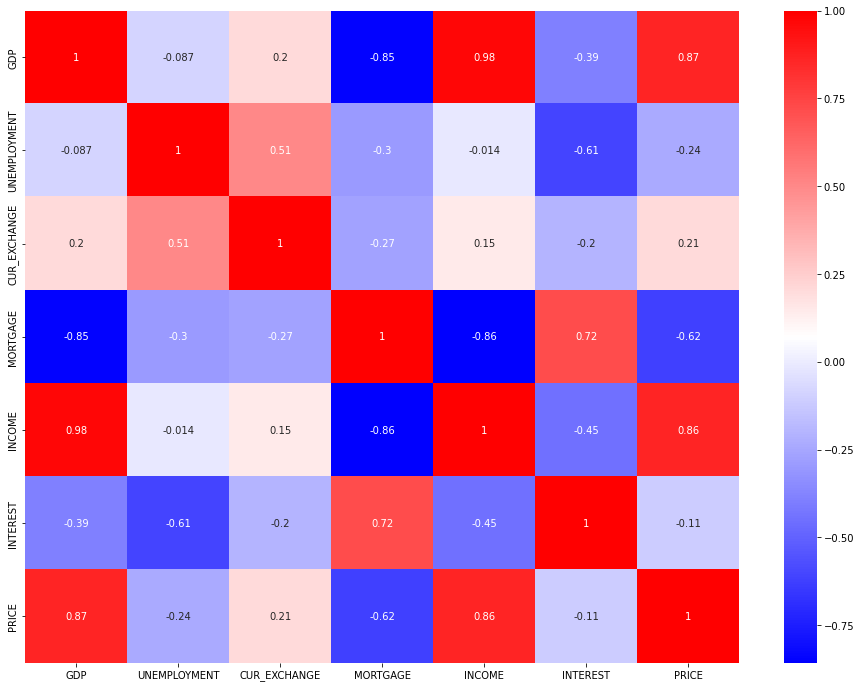

In [10]:
plt.figure(figsize=(16, 12))
sns.heatmap(normalized_df.corr(), cmap='bwr', annot=True)

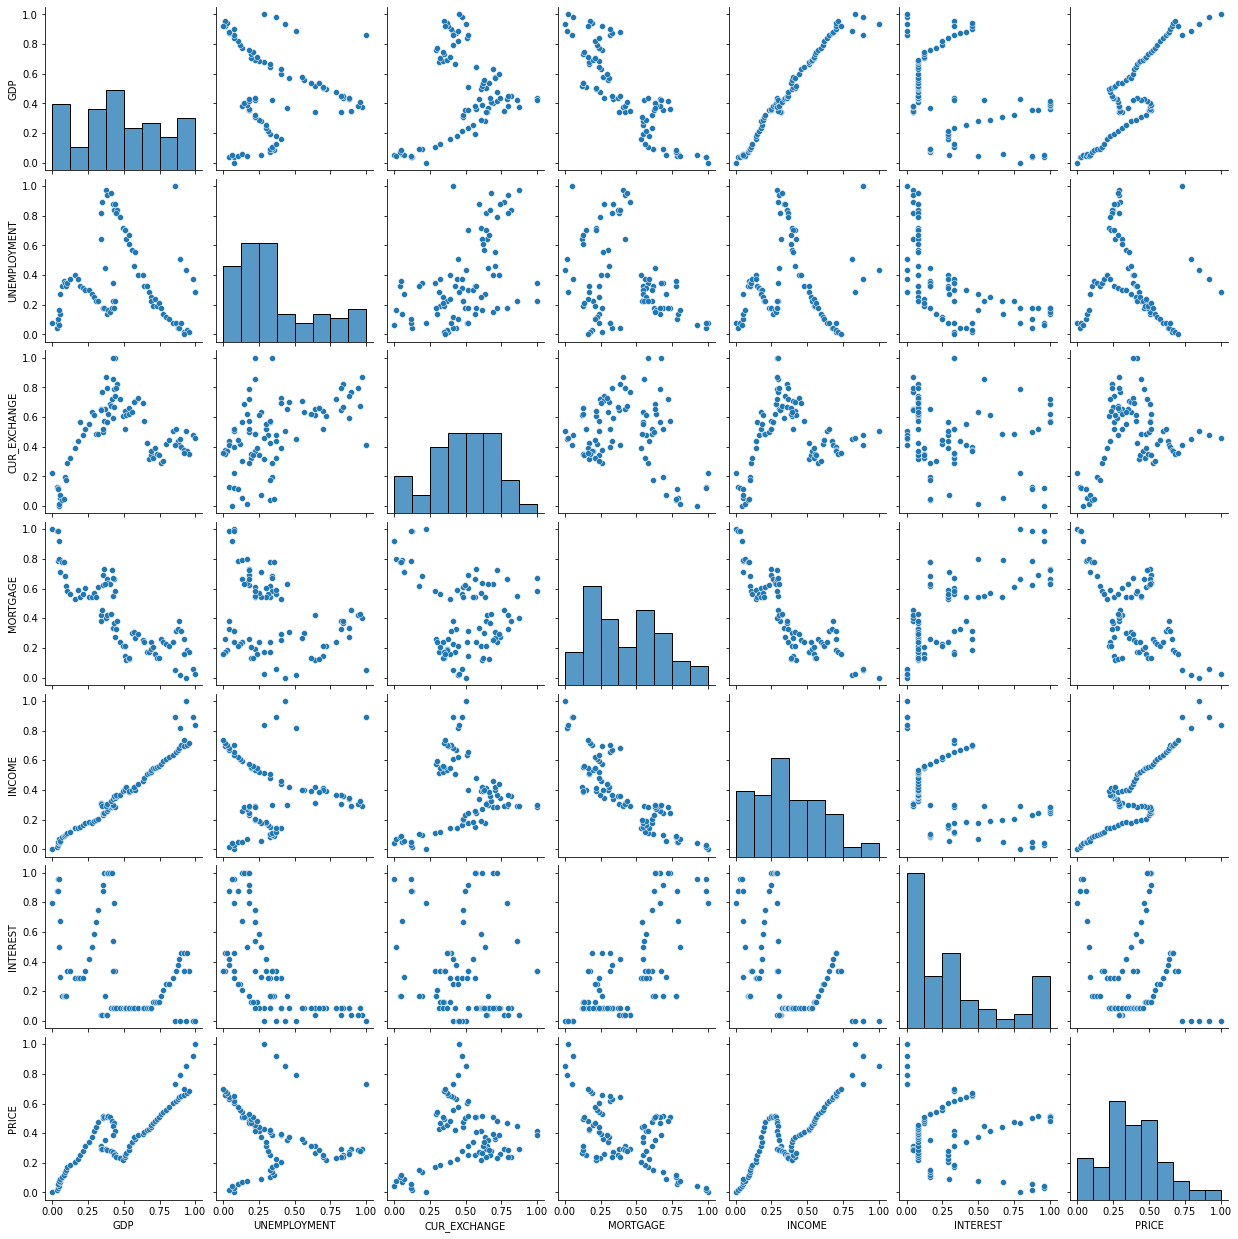

In [11]:
sns.pairplot(normalized_df)

In [12]:
X = normalized_df.drop(['PRICE'], axis=1)
y = normalized_df['PRICE']
print('X shape : ', X.shape, '\ty shape : ',y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('X_train : ', X_train.shape, '\ty_train : ', y_train.shape, '\nX_test : ', X_test.shape, '\ty_train : ', y_test.shape)

X shape :  (86, 6) 	y shape :  (86,)
X_train :  (68, 6) 	y_train :  (68,) 
X_test :  (18, 6) 	y_train :  (18,)


In [13]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score"])
scores = pd.DataFrame(columns=["Model","Training Score","Testing Score"])

In [15]:
def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

### Random Forest Regressor

In [16]:
random_forest = RandomForestRegressor(n_estimators = 100, max_depth = 6, random_state = 18)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 0.014424019610911339
MSE: 0.000387266015882766
RMSE: 0.01967907558506664
R2 Score: 0.9868023676381289
------------------------------


In [17]:
training = random_forest.score(X_train, y_train)
testing = random_forest.score(X_test, y_test)
print("Training:", training)
print("Testing:", testing)
new_score = {"Model": "RandomForestRegressor","Training Score": training,"Testing Score": testing}
scores = scores.append(new_score, ignore_index = True)

Training: 0.995241329464427
Testing: 0.9868023676381289


### Gradient Boosting Regressor

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

Model_=GradientBoostingRegressor(max_depth=7,max_features=6,n_estimators=200,random_state=18).fit(X_train,y_train)
print('Train mse:',mean_squared_error(y_train,Model_.predict(X_train)))

predictions = Model_.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

new_row = {"Model": "GradientBoostingRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

Train mse: 2.186110591281697e-16
MAE: 0.01240701899987003
MSE: 0.0002943551739888684
RMSE: 0.017156782157178203
R2 Score: 0.9899686747331434
------------------------------


In [20]:
training = Model_.score(X_train, y_train)
testing = Model_.score(X_test, y_test)
print("Training:", training)
print("Testing:", testing)
new_score = {"Model": "GradientBoostingRegressor","Training Score": training,"Testing Score": testing}
scores = scores.append(new_score, ignore_index = True)

Training: 0.9999999999999953
Testing: 0.9899686747331434


### Linear Regression

In [21]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 0.07251501037080874
MSE: 0.007229584260262515
RMSE: 0.0850269619606776
R2 Score: 0.7536231136144974
------------------------------


In [22]:
raining = lin_reg.score(X_train, y_train)
testing = lin_reg.score(X_test, y_test)
print("Training:", training)
print("Testing:", testing)
new_score = {"Model": "LinearRegression","Training Score": training,"Testing Score": testing}
scores = scores.append(new_score, ignore_index = True)

Training: 0.9999999999999953
Testing: 0.7536231136144974


### Ridge Regression

### SVR

In [23]:
svr = SVR()
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)


new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 0.06580795220439885
MSE: 0.005113784574771926
RMSE: 0.07151073048691313
R2 Score: 0.8257274172591538
------------------------------


In [24]:
raining = svr.score(X_train, y_train)
testing = svr.score(X_test, y_test)
print("Training:", training)
print("Testing:", testing)
new_score = {"Model": "SVR","Training Score": training,"Testing Score": testing}
scores = scores.append(new_score, ignore_index = True)

Training: 0.9999999999999953
Testing: 0.8257274172591538


### Polynomial Regression

In [25]:
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, y_train)
predictions = lin_reg.predict(X_test_2d)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)


new_row = {"Model": "Polynomial (degree=2)","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 0.04379668249464751
MSE: 0.004509142186727616
RMSE: 0.06715014658753632
R2 Score: 0.8463330155315008
------------------------------


In [26]:
raining = lin_reg.score(X_train_2d, y_train)
testing = lin_reg.score(X_test_2d, y_test)
print("Training:", training)
print("Testing:", testing)
new_score = {"Model": "Polynomial Regression","Training Score": training,"Testing Score": testing}
scores = scores.append(new_score, ignore_index = True)

Training: 0.9999999999999953
Testing: 0.8463330155315008


### XGB Regressor

In [27]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

[22:54:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 0.013794083464315399
MSE: 0.00024677524862693753
RMSE: 0.01570908172449738
R2 Score: 0.9915901502486251
------------------------------


In [28]:
raining = xgb.score(X_train, y_train)
testing = xgb.score(X_test, y_test)
print("Training:", training)
print("Testing:", testing)
new_score = {"Model": "XGB","Training Score": training,"Testing Score": testing}
scores = scores.append(new_score, ignore_index = True)

Training: 0.9999999999999953
Testing: 0.9915901502486251


In [29]:
models.sort_values(by="RMSE")

,Model,MAE,MSE,RMSE,R2 Score
5,XGBRegressor,0.013794,0.000247,0.015709,0.991590
1,GradientBoostingRegressor,0.012407,0.000294,0.017157,0.989969
0,RandomForestRegressor,0.014424,0.000387,0.019679,0.986802
4,Polynomial (degree=2),0.043797,0.004509,0.067150,0.846333
3,SVR,0.065808,0.005114,0.071511,0.825727
2,LinearRegression,0.072515,0.007230,0.085027,0.753623


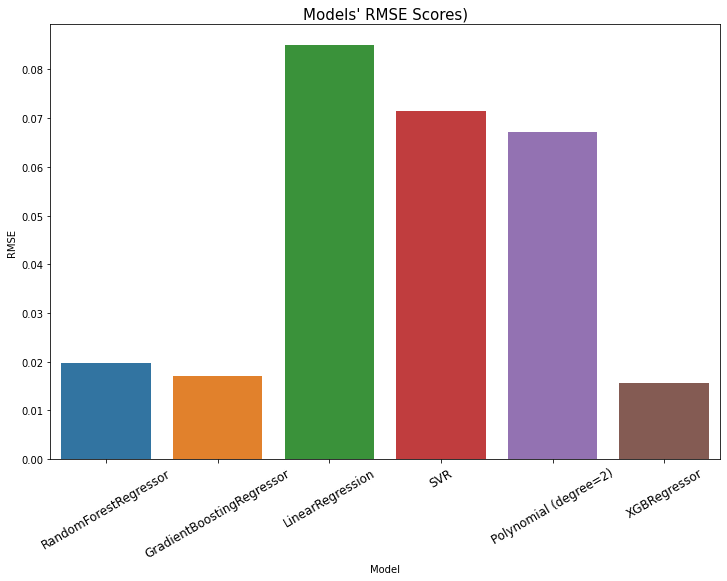

In [30]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE"])
plt.title("Models' RMSE Scores)", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

In [31]:
scores.sort_values(by="Testing Score")

,Model,Training Score,Testing Score
2,LinearRegression,1.000000,0.753623
3,SVR,1.000000,0.825727
4,Polynomial Regression,1.000000,0.846333
0,RandomForestRegressor,0.995241,0.986802
1,GradientBoostingRegressor,1.000000,0.989969
5,XGB,1.000000,0.991590


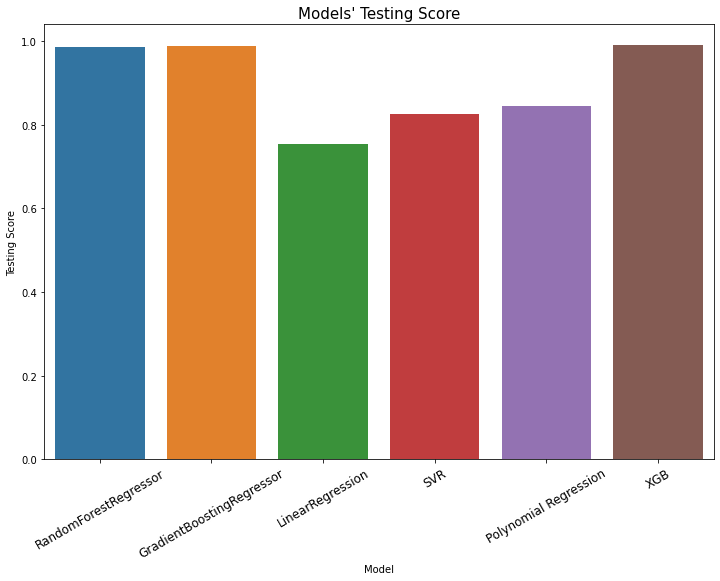

In [32]:
plt.figure(figsize=(12,8))
sns.barplot(x=scores["Model"], y=scores["Testing Score"])
plt.title("Models' Testing Score", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

## Conclusion

Since XGB has lowest error rate and highest testing accuracy, it was chosen as a final model of the Demand data.